In [50]:
# importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization
import numpy as np
from sklearn.preprocessing import StandardScaler # for variables standardization
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA            # for principal component analysis

In [51]:
# Data cleaning
file="Apprentice_Chef_Dataset.xlsx" 
df=pd.read_excel(file)
df=pd.DataFrame(df)
df=df.drop(["NAME","EMAIL","FIRST_NAME","FAMILY_NAME"],axis=1) #Dropping dummy variables from dataset
df_x_variables=df.drop("REVENUE",axis=1) # dropping REVENUE from data set
df_x_variables

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1,14,6,12,10,48.00,1,3,1,1,...,0,2,0,0,33.4,1,0,1,17,0
1,1,87,3,8,8,40.35,1,0,0,1,...,0,2,0,0,84.8,1,0,3,13,170
2,1,15,7,11,5,19.77,1,3,0,1,...,0,1,0,0,63.0,1,0,2,16,0
3,1,13,6,11,5,90.00,1,2,0,1,...,0,3,0,0,43.8,1,0,2,14,0
4,1,47,8,6,10,40.38,1,0,0,0,...,0,8,0,0,84.8,1,1,3,12,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,87,8,8,7,108.90,1,0,0,1,...,0,3,0,0,212.5,10,2,3,11,0
1942,0,244,4,7,2,133.91,1,1,2,1,...,0,3,0,0,282.2,10,1,4,10,424
1943,0,57,2,8,4,102.71,1,2,0,1,...,3,7,0,0,254.4,10,0,4,12,480
1944,0,74,3,10,10,638.87,0,0,0,1,...,0,3,0,0,564.2,10,3,3,11,796


In [52]:
# creating subset of x_variables
x_variables_subset,x_test,y_train,y_test = train_test_split(df_x_variables,df["REVENUE"],train_size=0.75,random_state=219)
x_variables_subset # a subset containing 75% of data or the original data

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
1084,0,47,2,5,10,225.02,1,0,0,0,...,0,1,0,0,165.2,4,1,3,12,136
583,1,37,7,6,5,94.00,1,5,0,1,...,4,0,1,0,111.2,4,1,2,17,0
325,1,87,6,3,4,148.80,1,1,0,1,...,1,2,1,0,127.3,3,0,2,16,0
869,1,137,3,4,3,77.64,0,2,1,0,...,0,6,1,1,98.0,4,0,3,13,153
114,0,50,1,5,2,43.00,1,1,2,1,...,0,3,1,0,93.6,2,0,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,0,31,4,6,3,54.00,1,0,0,1,...,0,2,0,0,131.6,4,0,3,12,0
715,1,37,3,4,7,118.20,1,2,0,0,...,4,1,1,0,123.2,4,0,3,13,0
1769,0,57,4,3,5,77.07,1,0,0,0,...,0,6,0,0,151.3,6,0,3,14,0
764,1,46,9,4,10,65.60,1,0,1,1,...,0,3,1,0,100.8,4,0,2,17,54


In [53]:
# Standardizing the data set
scaler = StandardScaler()
scaler.fit(x_variables_subset)
X_scaled=scaler.transform(x_variables_subset) 

In [54]:
# Reattaching feature names from original data set
X_scaled_df=pd.DataFrame(X_scaled, columns= df_x_variables.columns) 
X_scaled_df

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,-1.446064,-0.500585,-1.173749,-0.869823,1.490954,1.963225,0.378704,-0.896033,-0.387584,-1.539323,...,-0.658828,-0.717748,-0.746389,-0.357088,0.283865,-0.298090,0.580780,0.257153,-0.630972,0.160120
1,0.691532,-0.686322,0.826368,-0.428253,-0.151527,-0.095549,0.378704,2.292533,-0.387584,0.649636,...,1.042464,-1.080224,1.339783,-0.357088,-0.799396,-0.298090,0.580780,-1.068594,1.486297,-0.585447
2,0.691532,0.242362,0.426344,-1.752962,-0.480023,0.765547,0.378704,-0.258320,-0.387584,0.649636,...,-0.233505,-0.355272,1.339783,-0.357088,-0.476424,-0.948186,-0.954289,-1.068594,1.062843,-0.585447
3,0.691532,1.171045,-0.773726,-1.311392,-0.808519,-0.352620,-2.640583,0.379394,1.874358,-1.539323,...,-0.658828,1.094634,1.339783,2.800433,-1.064193,-0.298090,-0.954289,0.257153,-0.207518,0.253315
4,-1.446064,-0.444864,-1.573773,-0.869823,-1.137015,-0.896934,0.378704,-0.258320,4.136300,0.649636,...,-0.658828,0.007205,1.339783,-0.357088,-1.152459,-1.598281,-0.954289,-1.068594,1.062843,-0.585447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.446064,-0.797764,-0.373702,-0.428253,-0.808519,-0.724086,0.378704,-0.896033,-0.387584,0.649636,...,-0.658828,-0.355272,-0.746389,-0.357088,-0.390164,-0.298090,-0.954289,0.257153,-0.630972,-0.585447
1455,0.691532,-0.686322,-0.773726,-1.311392,0.505465,0.284716,0.378704,0.379394,-0.387584,-1.539323,...,1.042464,-0.717748,1.339783,-0.357088,-0.558671,-0.298090,-0.954289,0.257153,-0.207518,-0.585447
1456,-1.446064,-0.314849,-0.373702,-1.752962,-0.151527,-0.361577,0.378704,-0.896033,-0.387584,-1.539323,...,-0.658828,1.094634,-0.746389,-0.357088,0.005025,1.002100,-0.954289,0.257153,0.215935,-0.585447
1457,0.691532,-0.519159,1.626415,-1.311392,1.490954,-0.541810,0.378704,-0.896033,1.874358,0.649636,...,-0.658828,0.007205,1.339783,-0.357088,-1.008024,-0.298090,-0.954289,-1.068594,1.486297,-0.289413


In [55]:
# Running principal component analysis using 23 components
pca=PCA()
pca.fit(X_scaled_df)
components=pca.transform(X_scaled_df)

In [56]:
# resulting factors presentation
components_df= pd.DataFrame(pca.components_.T,index=X_scaled_df.columns)
components_df.round(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
CROSS_SELL_SUCCESS,0.03,0.22,-0.29,0.48,-0.09,-0.29,0.11,0.19,-0.01,0.13,...,-0.16,-0.07,-0.03,-0.65,-0.03,-0.05,-0.03,0.00,0.00,-0.00
TOTAL_MEALS_ORDERED,0.36,-0.00,0.04,-0.08,-0.14,0.10,0.00,0.08,0.05,-0.09,...,-0.04,-0.09,-0.25,-0.03,0.30,0.08,-0.71,-0.35,-0.09,0.06
UNIQUE_MEALS_PURCH,0.06,0.10,0.43,0.20,-0.09,0.27,0.20,0.16,-0.18,-0.36,...,-0.32,0.06,-0.42,0.04,-0.09,-0.14,0.17,0.20,0.02,0.00
CONTACTS_W_CUSTOMER_SERVICE,0.03,0.03,-0.16,0.30,0.20,0.54,0.19,-0.17,-0.07,0.15,...,-0.26,-0.01,0.24,0.05,-0.17,-0.15,-0.19,-0.11,-0.05,-0.02
PRODUCT_CATEGORIES_VIEWED,0.02,0.05,0.13,-0.09,-0.49,-0.03,0.29,0.02,-0.27,0.00,...,-0.04,0.44,0.18,-0.06,0.06,-0.09,-0.01,-0.02,-0.01,0.00
AVG_TIME_PER_SITE_VISIT,0.16,-0.08,0.36,0.19,0.21,-0.07,-0.03,0.26,-0.08,-0.01,...,-0.05,0.26,0.60,0.06,-0.06,0.32,-0.11,-0.08,-0.04,-0.00
MOBILE_NUMBER,0.02,-0.03,-0.36,0.15,0.11,-0.21,-0.23,0.28,-0.47,-0.29,...,-0.28,-0.19,0.04,0.38,0.10,0.03,-0.01,0.05,0.00,0.00
CANCELLATIONS_BEFORE_NOON,0.01,0.26,-0.19,0.30,-0.16,0.05,0.32,0.35,0.26,0.20,...,0.35,0.03,-0.10,0.53,0.01,0.03,0.04,-0.02,-0.00,0.00
CANCELLATIONS_AFTER_NOON,-0.02,-0.03,0.02,-0.16,0.29,0.05,-0.24,0.59,0.33,0.02,...,-0.10,0.39,-0.17,-0.15,0.07,-0.10,0.04,-0.00,0.00,0.00
TASTES_AND_PREFERENCES,0.01,-0.01,0.17,0.36,0.02,-0.47,-0.08,-0.33,-0.06,-0.04,...,0.12,0.33,-0.22,0.13,0.17,0.11,-0.04,-0.07,-0.00,0.01


C:\Users\SAMSON\AppData\Local\Temp/ipykernel_4720/2765063258.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(pc_values , pca.explained_variance_,"ro-" , linewidth=2,color="green")


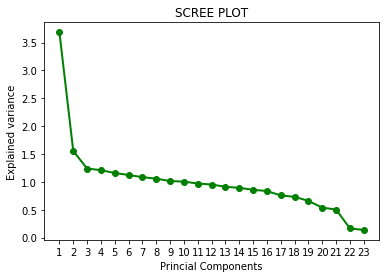

In [57]:
# plotting scree plot
pc_values=np.arange(pca.n_components_) + 1
plt.plot(pc_values , pca.explained_variance_,"ro-" , linewidth=2,color="green")
plt.title("SCREE PLOT")
plt.xlabel("Princial Components")
plt.ylabel("Explained variance")
plt.xticks(pc_values,pc_values)
plt.show()


 The Scree plot shows the Explained varince on the Y-axis and The Principal components on the X-axis and it can be see from the scree plot that an elbow is formed at the point where principal components=3 hence we will carry out another Principal component analysis retaining only 3 principal components.
 This is done below;

In [58]:
# Running principal component analysis again with 3 retained components as seen from scree plot elbow point
pca=PCA(n_components=3)
pca.fit(X_scaled_df)
components=pca.transform(X_scaled_df)



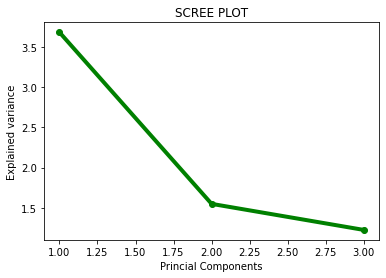

In [59]:
# plotting scree plot for 3 components
pc_values=np.arange(pca.n_components_) + 1
plt.plot(pc_values , pca.explained_variance_,"o-" , linewidth=4,color="green")
plt.title("SCREE PLOT")
plt.xlabel("Princial Components")
plt.ylabel("Explained variance")
plt.show()

The scree plot after retaining looks like a better fit hence can proceed to review our factor loadings. This is done below

In [60]:
# resulting factors presentation
print(" "*30,"RESULTING FACTORS PRESENTATION FOR RETAINED COMPONENTS"," "*30)
components_df= pd.DataFrame(pca.components_.T,columns=["comp_1","comp_2","comp_3"],index=X_scaled_df.columns)
components_df.round(2)

                               RESULTING FACTORS PRESENTATION FOR RETAINED COMPONENTS                               


,comp_1,comp_2,comp_3
CROSS_SELL_SUCCESS,0.03,0.22,-0.44
TOTAL_MEALS_ORDERED,0.36,0.00,0.06
UNIQUE_MEALS_PURCH,0.06,0.11,0.35
CONTACTS_W_CUSTOMER_SERVICE,0.03,0.04,-0.32
PRODUCT_CATEGORIES_VIEWED,0.02,0.06,0.16
AVG_TIME_PER_SITE_VISIT,0.16,-0.08,0.31
MOBILE_NUMBER,0.02,-0.05,-0.31
CANCELLATIONS_BEFORE_NOON,0.01,0.23,-0.21
CANCELLATIONS_AFTER_NOON,-0.02,-0.02,0.07
TASTES_AND_PREFERENCES,0.01,0.01,0.01


                            ______________________RESULT INTERPRETATION____________________

for the sake of these analysis we will take the range for; 
strong correlation as 0.49<= r <= 1 ,
moderate correlation as 0.1 <= r < 0.49
and weak correlation as     0 <= r < 0.1.
     From the table above we can draw the following conclusions about the three retained principal components:
 
 * FIRST PRICIPAL COMPONENT
 
 i. The first principal component is strongly correlated with none of the original variables,but is moderetely correlated with eight original variables namely; Total_meal_ordered, Average time spent per site visit,Average prep video time,largest order size,Master classes attended,Median meal rating,Average clicks per visit and Total videos viewed  while the rest of the original variables are weakly correlated with the Third Principal component which makes them non statistical significant in describing the data structure of the first principal component i.e these variables constitutes little or nothing to the first principle component data.

ii.  The first principal component increases  with increase in Average time spent per site visit,Average prep video time,largest order size,Master classes attended,Median meal rating and Total videos viewed  scores since the moderate correlation between these variables and the first component appears to be positive. 

iii. The above suggests that these seven criteria vary together. If one increases, then the remaining ones tend to increase as well. This component can be viewed as a measure of the quality or relevance of Average time spent per site visit,Average prep video time,largest order size,Master classes attended,Median meal rating and Total videos viewed.

iv.  Furthermore, we see that the first principal component correlates most moderately with the Average prep time video variable.

v. The above allow us to consider Average prep video time a key variable in the first principal component with a correlation of 0.44.

vi.   It would follow that customers with high values spend more time watching Prep videos, Whereas customers with small values spend less time watching prep videos.
 
vii.  The first component have moderate negative correlation with the Average clicks per site visit which implies that an increase in the first component is caused by a decrease in Average clicks per site visit.


* SECOND PRINCIPAL COMPONENT


 
 i. The Second principal component is strongly correlated with two of the original variables namely; The package Locker and The Refrigirated Locker and is moderetely correlated with three original variables namely; Cross sell Promotion, cancellation before noon and mobile logins  while the rest of the original variables are weakly correlated with the Third Principal component which makes them non statistical significant in describing the data structure of the second principal component i.e these variables constitutes little or nothing to the second principle component data.

ii.  The Second principal component increases  with increase in Cross sells,Cancellations before noon Package lockers and Refrigerated lockers scores since the  moderate and strong correlation between these variables and the Second component appears to be positive. 

iii. The above suggests that these three criteria vary together. If one increases, then the remaining ones tend to increase as well. This component can be viewed as a measure of the quality or relevance of Cross sells, Package lockers and Refrigerated lockers and lack of quality of Cancellations before noon(since this is a bad thing) .

iv.  Furthermore, we see that the second principal component have most strong positive correlation with package lockers.

v. The above allow us to consider both package lockers and refrigerator lockers key variables in the second principal component with a correlation of 0.66 and 0.64 resperctively.

vi.   It would follow that customers with high values own package Lockers and/or Refrigerated lockers, Whereas customers with small values does not own a package locker and/or a refrigerated locker.
 
vii.  The second component have moderate negative correlation with the Mobile Logins variable which implies that an increase in the second component is caused by a decrease in Mobile logins.


* THIRD PRINCIPAL COMPONENT


 i. The Third principal component is strongly correlated with one of the original variables namely; The Unique meals purchase and is moderately correlated with twelve original variables namely; Cross sell promotion, Mobile numbers, Product category viewed,Average Time per site visit, cancellation before noon,PC logins, Weekly plans, Late deliveries, Refrigerated Lockers, Largest Ordered size, Meadian meal rating and Average clicks per visit while the rest of the original variables are weakly correlated with the Third Principal component which makes them non statistical significant in describing the data structure of the third principal component i.e these variables constitutes little or nothing to the third principle component data.

ii.  The Third principal component increases  with increase in Unique meals purchase,product categories viewed,Average time per site visit, weekly plan, late deliveries, refrigerated Lockers,largest Order size and Avearage clicks per visit scores since the  moderate and strong correlation between these variables and the third principal component appears to be positive. 

iii. The above suggests that these eight criteria vary together. If one increases, then the remaining ones tend to increase as well. This component can be viewed as a measure of the quality or relevance of Unique meals purchase,product categories viewed,Average time per site visit, weekly plan, refrigerated Lockers,largest Order size and Avearage clicks per visit and a measure of irrelevance of  late deliveries (since this is a bad thing) .

iv.  Furthermore, we see that the third principal component most strong positive correlation is with the Unique Meals purchase which tells us that a large part of the data structure of the third prinpal component is attributed to Unique Meals purchase.

v. The above also allows us to consider the Unique Meals Purchase key variables in the third principal component with a correlation of 0.49.

vi.   It would follow that customers with high values purchase much unique meals, Whereas customers with small values does not purchase much unique meals.
 
vii.  The third principal component have moderate negative correlation with the Cross sell promotion, Mobile numbers, cancellations Before Noon,PC Logins and Median meal ratings variable which implies that an increase in the second component is caused by a decrease in  Cross sell promotion, Mobile numbers, cancellations Before Noon,PC Logins and Median meal ratings, hence these variables tends to vary together i.e if one decreases then the rest tend to decrease moderately.


* CONCLUSION :
 With the above Principal Component Analysis we have been able to reduce the dimensionality of the Apprentice chef data set from 23 features to 3 components lower dimensionality without loss of Originality,genuity and attributes of the data, hence we can carry out further analysis using our principal components for better fittings and accurate predictability.


 
 